In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import requests
import json

In [4]:
url = "https://fantasy.premierleague.com/api/element-summary/239/"

In [5]:
response = requests.get(url)
dataInJson = response.json()
print(dataInJson)

{'fixtures': [{'code': 1059856, 'team_h': 11, 'team_h_score': None, 'team_a': 12, 'team_a_score': None, 'event': 16, 'finished': False, 'minutes': 0, 'provisional_start_time': False, 'kickoff_time': '2019-12-07T17:30:00Z', 'event_name': 'Gameweek 16', 'is_home': False, 'difficulty': 5}, {'code': 1059868, 'team_h': 12, 'team_h_score': None, 'team_a': 8, 'team_a_score': None, 'event': 17, 'finished': False, 'minutes': 0, 'provisional_start_time': False, 'kickoff_time': '2019-12-15T14:00:00Z', 'event_name': 'Gameweek 17', 'is_home': True, 'difficulty': 2}, {'code': 1059880, 'team_h': 18, 'team_h_score': None, 'team_a': 12, 'team_a_score': None, 'event': 18, 'finished': False, 'minutes': 0, 'provisional_start_time': False, 'kickoff_time': '2019-12-22T14:00:00Z', 'event_name': 'Gameweek 18', 'is_home': False, 'difficulty': 2}, {'code': 1059888, 'team_h': 12, 'team_h_score': None, 'team_a': 13, 'team_a_score': None, 'event': 19, 'finished': False, 'minutes': 0, 'provisional_start_time': Fals

In [6]:
print(json.dumps(dataInJson, indent=4, sort_keys=True))

{
    "fixtures": [
        {
            "code": 1059856,
            "difficulty": 5,
            "event": 16,
            "event_name": "Gameweek 16",
            "finished": false,
            "is_home": false,
            "kickoff_time": "2019-12-07T17:30:00Z",
            "minutes": 0,
            "provisional_start_time": false,
            "team_a": 12,
            "team_a_score": null,
            "team_h": 11,
            "team_h_score": null
        },
        {
            "code": 1059868,
            "difficulty": 2,
            "event": 17,
            "event_name": "Gameweek 17",
            "finished": false,
            "is_home": true,
            "kickoff_time": "2019-12-15T14:00:00Z",
            "minutes": 0,
            "provisional_start_time": false,
            "team_a": 8,
            "team_a_score": null,
            "team_h": 12,
            "team_h_score": null
        },
        {
            "code": 1059880,
            "difficulty": 2,
            "event

In [7]:
def getPointsEachGW(json_for_player):
    
    list_of_points = []
    
    for key in json_for_player:
        if key=='history':
            value = json_for_player[key]
            for item in value:
                if item.get('minutes') != 0:
                    #print("points:\t\t", item.get('total_points'))
                    #print("minutes:\t",item.get('minutes'))
                    list_of_points.append(item.get('total_points'))
                        
    return list_of_points

In [8]:
allData = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/").json()

In [9]:
def get_team_code (teamId):
    teamCode = None
    for key in allData:
        if key == 'teams':
            value = allData[key]
            for item in value:
                if item.get('id')==teamId:
                    teamCode = item.get('short_name')
            if teamCode is None:
                teamCode = np.nan
    return teamCode

In [10]:
def get_player_position(positionId):
    positionCode = None
    for key in allData:
        if key == 'element_types':
            value = allData[key]
            for item in value:
                if item.get('id')==positionId:
                    positionCode = item.get('singular_name_short')
            if positionCode is None:
                positionCode = np.nan
    return positionCode

In [121]:
player_first_name = []
player_second_name = []
player_id = []
player_pos = []
player_club = []
goals_scored = []
assists = []
total_points = []
minutes = []
bonus = []
bps = []
clean_sheets = []
yellow_cards = []
cost = []
points_per_90 = []
std = []
selected_by_percent = []
gw_in = []
gw_out = []
for key in allData:
    if key == 'elements':
        value = allData[key]
        #print(len(value))
        for item in value:
            player_first_name.append(item.get('first_name'))
            player_second_name.append(item.get('second_name'))
            player_id.append(item.get('id'))
            player_pos.append(get_player_position(item.get('element_type')))
            player_club.append(get_team_code(item.get('team')))
            goals_scored.append(item.get('goals_scored'))
            assists.append(item.get('assists'))
            total_points.append(item.get('total_points'))
            minutes.append(item.get('minutes'))
            bonus.append(item.get('bonus'))
            bps.append(item.get('bps'))
            clean_sheets.append(item.get('clean_sheets'))
            yellow_cards.append(item.get('yellow_cards'))
            cost.append(item.get('now_cost')/10)
            if item.get('minutes')==0:
                points_per_90.append(np.nan)
            else:
                points_per_90.append(np.round((item.get('total_points')/item.get('minutes'))*90,1))
            std.append(np.std(getPointsEachGW(requests.get("https://fantasy.premierleague.com/api/element-summary/"+str(item.get('id'))+"/").json())))
            selected_by_percent.append(np.float(item.get('selected_by_percent')))
            gw_in.append(item.get('transfers_in_event'))
            gw_out.append(item.get('transfers_out_event'))


C:\Users\Kunal lap.KUNAL\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Kunal lap.KUNAL\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Kunal lap.KUNAL\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [122]:
fpl = pd.DataFrame(data = {
    'Id':player_id,
    'First Name':player_first_name, 
    'Second Name':player_second_name, 
    'Club':player_club, 
    'Position':player_pos, 
    'Goals Scored':goals_scored,
    'Assists': assists,
    'Total Points':total_points,
    'Minutes':minutes,
    'Bonus':bonus,
    'bps':bps,
    'CS': clean_sheets,
    'YC': yellow_cards,
    'Cost':cost,
    'PP90':points_per_90,
    'STD':np.round(std,3),
    'Selected By Percent':selected_by_percent,
    'GW IN':gw_in,
    'GW OUT':gw_out})

In [123]:
fpl

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
0,1,Shkodran,Mustafi,ARS,DEF,0,1,4,90,0,24,0,0,5.2,4.0,0.000,0.3,133,295
1,2,Héctor,Bellerín,ARS,DEF,0,0,1,262,0,26,0,2,5.4,0.3,0.471,0.3,559,1668
2,3,Sead,Kolasinac,ARS,DEF,0,1,22,828,1,165,1,2,5.2,2.4,1.675,0.6,473,1353
3,4,Ainsley,Maitland-Niles,ARS,DEF,0,2,17,490,3,92,1,0,4.6,3.1,4.598,2.7,165,6836
4,5,Sokratis,Papastathopoulos,ARS,DEF,1,0,31,1170,2,205,2,4,4.9,2.4,2.647,1.6,365,5582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,528,Pedro,Lomba Neto,WOL,MID,0,2,14,160,0,39,0,1,5.0,7.9,1.343,0.0,123,67
561,559,Bernard,Ashley-Seal,WOL,FWD,0,0,0,0,0,0,0,0,4.5,NaN,NaN,0.0,218,253
562,560,Taylor,Perry,WOL,MID,0,0,0,0,0,0,0,0,4.5,NaN,NaN,0.0,90,105
563,566,Owen,Otasowie,WOL,MID,0,0,0,0,0,0,0,0,4.5,NaN,NaN,0.0,31,11


In [124]:
fpl[(fpl['Position']=='MID') & (fpl['Total Points']>=30) & (fpl['PP90']>=4)].sort_values(by='Cost', ascending=True)

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
54,470,Douglas Luiz,Soares de Paulo,AVL,MID,2,0,36,757,2,151,4,1,4.5,4.3,2.224,3.8,4805,14042
376,287,Todd,Cantwell,NOR,MID,4,2,59,1087,5,194,2,1,4.7,4.9,3.193,19.0,86627,25596
157,119,N'Golo,Kanté,CHE,MID,3,0,31,584,2,125,1,1,5.0,4.8,3.059,4.7,9569,10190
348,269,Jonjo,Shelvey,NEW,MID,4,0,46,760,6,180,2,0,5.0,5.4,3.441,0.8,26169,1146
554,417,Adama,Traoré,WOL,MID,2,3,53,1098,6,213,3,0,5.2,4.3,3.876,4.8,14296,23263
525,393,Robert,Snodgrass,WHU,MID,2,1,33,650,4,117,1,2,5.2,4.6,3.035,0.4,244,3676
53,465,Mahmoud Ahmed,Ibrahim Hassan,AVL,MID,3,1,37,839,2,108,1,2,5.2,4.0,2.878,1.6,12051,2743
407,453,Callum,Robinson,SHU,MID,1,2,30,551,1,60,2,0,5.2,4.9,2.754,0.3,127,1128
552,415,João Filipe Iria,Santos Moutinho,WOL,MID,1,4,56,1259,9,264,4,2,5.4,4.0,2.768,5.4,51301,7011
38,30,Anwar,El Ghazi,AVL,MID,3,4,52,852,0,173,3,1,5.5,5.5,2.631,1.2,597,17367


In [67]:
MIDS = fpl[(fpl['Position']=='MID') & (fpl['Total Points']>=30) & (fpl['PP90']>=4.5)].sort_values(by='Cost', ascending=True)

In [68]:
sns.set(font_scale=1.5)

In [69]:
cus = (MIDS['Second Name']+' ('+MIDS['Club']+')').tolist()

In [70]:
def show_values_on_bars(DF, axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = float(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=15) 
        elif h_v == "h":
            c=0
            ax.text(ax.patches[0].get_x()+float(space), ax.patches[0].get_y()-3*float(space), "STD", ha="left", fontsize=12)
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space)
                value = float(p.get_width())
                price = u'\u00A3'+str(DF['Cost'].iloc[c])+'m'
                std = np.round(np.std(getPointsEachGW(requests.get("https://fantasy.premierleague.com/api/element-summary/"+str(DF['Id'].iloc[c])+"/").json())),3)
                ax.text(_x, _y, value, ha="left",fontsize=10)
                ax.text(_x/2, _y, price, ha="left", fontsize=15, color='w')
                ax.text(p.get_x()+float(space), _y, std, ha="left", fontsize=10, color='w')
                c+=1

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

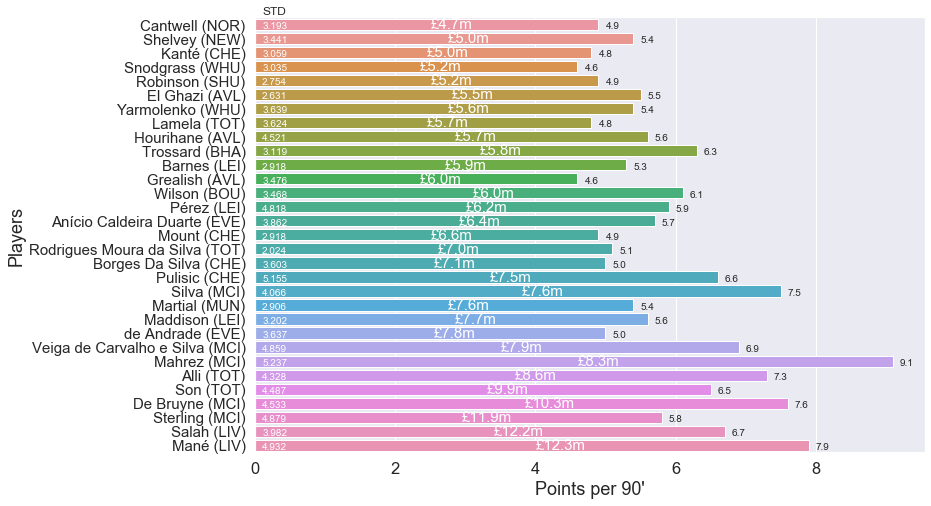

In [71]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y = MIDS['Second Name'], x = MIDS['PP90'], orient='h')
ax.set_yticklabels(cus, rotation='horizontal', fontsize=15)
plt.ylabel('Players')
plt.xlabel('Points per 90\'')
show_values_on_bars(MIDS,ax, "h", 0.1)

In [72]:
fpl[(fpl['Position']=='FWD') & (fpl['Total Points']>=30)& (fpl['Total Points']<=50)].sort_values(by='PP90', ascending=False)

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
255,188,Divock,Origi,LIV,FWD,3,1,35,360,6,130,0,0,5.2,8.8,4.291,2.8,14059,2664
282,211,Gabriel Fernando,de Jesus,MCI,FWD,5,2,47,635,4,171,3,1,9.6,6.7,3.593,3.6,51845,8803
11,12,Alexandre,Lacazette,ARS,FWD,5,2,47,661,6,160,0,2,9.3,6.4,3.348,2.4,4816,16109
114,534,Aaron,Connolly,BHA,FWD,2,2,33,558,3,83,2,0,4.7,5.3,3.717,2.4,6526,16167
67,68,Joshua,King,BOU,FWD,3,3,50,1006,6,161,2,0,6.2,4.5,3.532,4.5,97,30117
201,147,Dominic,Calvert-Lewin,EVE,FWD,3,0,33,677,2,95,2,1,5.7,4.4,2.135,0.9,612,2924
489,363,Gerard,Deulofeu,WAT,FWD,2,2,44,1013,6,156,3,2,6.1,3.9,3.087,2.4,3779,17131
351,466,Joelinton Cássio,Apolinário de Lira,NEW,FWD,1,1,36,1123,3,109,2,2,5.7,2.9,1.744,1.0,1904,3378
547,410,Diogo,Jota,WOL,FWD,1,1,31,970,3,85,3,3,6.1,2.9,2.168,3.0,2391,6819


In [73]:
getPointsEachGW(requests.get("https://fantasy.premierleague.com/api/element-summary/70/").json())

[1, 1, 5, 1, 1, 6, 7, 13, 2, 7, 9, 1]

In [74]:
cap = fpl[fpl['Total Points']>=63].sort_values(by='Total Points', ascending=False).head(20)#['Id'].values

In [75]:
cap

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
228,166,Jamie,Vardy,LEI,FWD,14,4,115,1350,19,412,7,2,10.0,7.7,5.485,48.6,115457,8277
259,192,Sadio,Mané,LIV,MID,9,6,109,1236,15,318,3,1,12.3,7.9,4.932,42.7,164704,19528
286,215,Kevin,De Bruyne,MCI,MID,4,10,96,1132,13,393,6,0,10.3,7.6,4.533,41.1,55682,78293
162,460,Tammy,Abraham,CHE,FWD,11,3,95,1041,19,321,4,2,7.9,8.2,4.988,34.5,298068,44016
311,233,Marcus,Rashford,MUN,FWD,9,5,92,1306,17,342,3,2,8.8,6.3,4.129,19.2,143873,24072
10,11,Pierre-Emerick,Aubameyang,ARS,FWD,10,2,89,1350,15,342,2,2,10.9,5.9,3.678,22.3,19539,122258
222,159,Ricardo Domingos,Barbosa Pereira,LEI,DEF,2,1,82,1350,10,340,7,0,6.5,5.5,3.384,17.0,77724,11286
367,278,Teemu,Pukki,NOR,FWD,8,3,82,1335,13,303,2,2,6.6,5.5,4.717,18.7,47328,35614
285,214,Raheem,Sterling,MCI,MID,8,1,79,1221,7,267,5,4,11.9,5.8,4.879,27.6,9261,165556
290,219,David,Silva,MCI,MID,3,8,77,920,8,279,6,0,7.6,7.5,4.066,8.7,63738,12846


In [76]:
gw = requests.get("https://fantasy.premierleague.com/api/fixtures/").json()

In [77]:
print(json.dumps(gw, indent=4, sort_keys=True))

[
    {
        "code": 1059881,
        "event": null,
        "finished": false,
        "finished_provisional": false,
        "id": 180,
        "kickoff_time": null,
        "minutes": 0,
        "provisional_start_time": false,
        "started": null,
        "stats": [],
        "team_a": 10,
        "team_a_difficulty": 2,
        "team_a_score": null,
        "team_h": 19,
        "team_h_difficulty": 4,
        "team_h_score": null
    },
    {
        "code": 1059702,
        "event": 1,
        "finished": true,
        "finished_provisional": true,
        "id": 1,
        "kickoff_time": "2019-08-09T19:00:00Z",
        "minutes": 90,
        "provisional_start_time": false,
        "started": true,
        "stats": [
            {
                "a": [
                    {
                        "element": 278,
                        "value": 1
                    }
                ],
                "h": [
                    {
                        "element": 183

In [78]:
def getPastFixturesListForPlayer(json_for_player):
    fixture_list=[]
    for key in json_for_player:
        if key=='history':
            value = json_for_player[key]
            for item in value:
                fixture_list.append(item.get('fixture'))
    return fixture_list

In [79]:
getPastFixturesListForPlayer(requests.get("https://fantasy.premierleague.com/api/element-summary/239/").json())

[9, 20, 25, 39, 45, 60, 67, 76, 87, 97, 103, 115, 128, 135, 144]

In [80]:
def get_points_per_90_home_away(json_for_player):
    points_home, points_away, minutes_home, minutes_away, pp90_home, pp90_away = 0.0,0.0,0.0,0.0,0.0,0.0
    for key in json_for_player:
        if key=='history':
            value = json_for_player[key]
            for item in value:
                if item.get('minutes') > 0:
                    if item.get('was_home') == True:
                        points_home += item.get('total_points')
                        minutes_home += item.get('minutes')
                    elif item.get('was_home') == False:
                        points_away += item.get('total_points')
                        minutes_away += item.get('minutes')
    pp90_home = np.round((points_home/minutes_home)*90,1)
    pp90_away = np.round((points_away/minutes_away)*90,1)
    return [points_home, pp90_home, points_away, pp90_away]

In [81]:
get_points_per_90_home_away(requests.get("https://fantasy.premierleague.com/api/element-summary/239/").json())

[25.0, 6.3, 17.0, 4.5]

In [82]:
def getFDRdetails(list_of_ids):
    points_at_home=[]
    points_away=[]
    pp90_home=[]
    pp90_away=[]
    pp90_fdr2=[]
    pp90_fdr3=[]
    pp90_fdr4=[]
    pp90_fdr5=[]
    for id in list_of_ids:
        pp90fdr2, pp90fdr3, pp90fdr4, pp90fdr5 = 0.0, 0.0, 0.0, 0.0
        pointsfdr2,pointsfdr3,pointsfdr4,pointsfdr5 = 0.0, 0.0, 0.0, 0.0
        minutesfdr2,minutesfdr3,minutesfdr4,minutesfdr5 = 0.0, 0.0, 0.0, 0.0
        team_h_difficulty, team_a_difficulty = 0, 0
        json_for_player = requests.get("https://fantasy.premierleague.com/api/element-summary/"+str(id)+"/").json()
        points_at_home.append(get_points_per_90_home_away(json_for_player)[0])
        points_away.append(get_points_per_90_home_away(json_for_player)[2])
        pp90_home.append(get_points_per_90_home_away(json_for_player)[1])
        pp90_away.append(get_points_per_90_home_away(json_for_player)[3])
        for key in json_for_player:
            if key=='history':
                value = json_for_player[key]
                for item in value:
                    if item.get('minutes')!=0:
                        fixture = item.get('fixture')
                        for gwitem in gw:
                            if gwitem.get('id')==fixture:
                                team_h_difficulty, team_a_difficulty = 0, 0
                                if item.get('was_home'):
                                    #print("HOME: ",gwitem.get('team_h_difficulty'),item.get('element'),item.get('total_points')," points")
                                    team_h_difficulty = gwitem.get('team_h_difficulty')
                                elif item.get('was_home')==False:
                                    #print("AWAY: ",gwitem.get('team_a_difficulty'),item.get('element'),item.get('total_points'))
                                    team_a_difficulty = gwitem.get('team_a_difficulty')
                                if team_h_difficulty==2 or team_a_difficulty==2:
                                    pointsfdr2 += item.get('total_points')
                                    minutesfdr2 += item.get('minutes')
                                elif team_h_difficulty==3 or team_a_difficulty==3:
                                    pointsfdr3 += item.get('total_points')
                                    minutesfdr3 += item.get('minutes')
                                elif team_h_difficulty==4 or team_a_difficulty==4:
                                    pointsfdr4 += item.get('total_points')
                                    minutesfdr4 += item.get('minutes')
                                elif team_h_difficulty==5 or team_a_difficulty==5:
                                    pointsfdr5 += item.get('total_points')
                                    minutesfdr5 += item.get('minutes')
        if minutesfdr2>0.0:
            pp90_fdr2.append(np.round((pointsfdr2/minutesfdr2)*90,1))
        else:
            pp90_fdr2.append(0.0)
        if minutesfdr3>0.0:
            pp90_fdr3.append(np.round((pointsfdr3/minutesfdr3)*90,1))
        else:
            pp90_fdr3.append(0.0)
        if minutesfdr4>0.0:
            pp90_fdr4.append(np.round((pointsfdr4/minutesfdr4)*90,1))
        else:
            pp90_fdr4.append(0.0)
        if minutesfdr5>0.0:
            pp90_fdr5.append(np.round((pointsfdr5/minutesfdr5)*90,1))
        else:
            pp90_fdr5.append(0.0)
    #print(pp90_fdr2,"\n",pp90_fdr3,"\n",pp90_fdr4,"\n",pp90_fdr5)                                
    #print(points_at_home,pp90_home, points_away,pp90_away)
    
    return [points_at_home, pp90_home, points_away, pp90_away, pp90_fdr2, pp90_fdr3, pp90_fdr4, pp90_fdr5]

In [83]:
getFDRdetails(cap['Id'].values)

[[63.0,
  60.0,
  56.0,
  40.0,
  58.0,
  39.0,
  56.0,
  53.0,
  25.0,
  37.0,
  38.0,
  42.0,
  42.0,
  49.0,
  56.0,
  38.0,
  42.0,
  32.0,
  27.0,
  33.0],
 [7.9,
  8.5,
  10.0,
  7.0,
  7.4,
  4.9,
  7.0,
  7.7,
  4.3,
  7.3,
  5.6,
  8.1,
  7.6,
  6.3,
  8.4,
  5.0,
  7.3,
  4.8,
  4.3,
  4.1],
 [52.0,
  49.0,
  40.0,
  55.0,
  34.0,
  50.0,
  26.0,
  29.0,
  54.0,
  40.0,
  39.0,
  34.0,
  34.0,
  27.0,
  19.0,
  37.0,
  30.0,
  40.0,
  44.0,
  35.0],
 [7.4,
  7.3,
  5.7,
  9.4,
  5.1,
  7.1,
  3.7,
  3.7,
  7.0,
  7.7,
  5.6,
  5.2,
  6.2,
  3.9,
  4.2,
  5.4,
  9.2,
  5.2,
  6.4,
  5.0],
 [10.4,
  10.8,
  8.4,
  8.8,
  4.9,
  6.6,
  6.1,
  5.4,
  7.2,
  8.0,
  5.7,
  7.4,
  8.7,
  6.5,
  6.7,
  5.5,
  9.8,
  4.7,
  6.9,
  5.3],
 [7.3,
  5.7,
  7.2,
  12.0,
  4.2,
  4.5,
  6.0,
  2.5,
  5.7,
  7.7,
  4.0,
  7.6,
  6.0,
  8.0,
  4.5,
  4.8,
  8.4,
  5.7,
  7.4,
  5.7],
 [4.5,
  5.5,
  9.0,
  2.1,
  9.9,
  6.7,
  5.0,
  8.2,
  4.0,
  3.5,
  6.2,
  4.2,
  7.3,
  2.3,
  7.6,
  4.0

In [84]:
FDRdetails = getFDRdetails(cap['Id'].values)

In [85]:
cap_fdr = pd.DataFrame(data = {
    'Id':cap['Id'],
    'First Name':cap['First Name'], 
    'Second Name':cap['Second Name'], 
    'Club':cap['Club'], 
    'Position':cap['Position'], 
    'Goals Scored':cap['Goals Scored'],
    'Assists':cap['Assists'] ,
    'Total Points':cap['Total Points'],
    'Minutes':cap['Minutes'],
    'Home Points':FDRdetails[0],
    'Away Points':FDRdetails[2],
    'Home PP90':FDRdetails[1] ,
    'Away PP90':FDRdetails[3] ,
    'FDR 2 PP90':FDRdetails[4],
    'FDR 3 PP90':FDRdetails[5],
    'FDR 4 PP90':FDRdetails[6],
    'FDR 5 PP90':FDRdetails[7],
})

In [86]:
cap_fdr[['Id','Second Name','Total Points','Home PP90','Away PP90','FDR 2 PP90','FDR 3 PP90','FDR 4 PP90','FDR 5 PP90']]#.sort_values(by='FDR 4 PP90',ascending=False)

,Id,Second Name,Total Points,Home PP90,Away PP90,FDR 2 PP90,FDR 3 PP90,FDR 4 PP90,FDR 5 PP90
228,166,Vardy,115,7.9,7.4,10.4,7.3,4.5,2.0
259,192,Mané,109,8.5,7.3,10.8,5.7,5.5,0.0
286,215,De Bruyne,96,10.0,5.7,8.4,7.2,9.0,2.0
162,460,Abraham,95,7.0,9.4,8.8,12.0,2.1,2.5
311,233,Rashford,92,7.4,5.1,4.9,4.2,9.9,0.0
10,11,Aubameyang,89,4.9,7.1,6.6,4.5,6.7,5.0
222,159,Barbosa Pereira,82,7.0,3.7,6.1,6.0,5.0,1.0
367,278,Pukki,82,7.7,3.7,5.4,2.5,8.2,7.7
285,214,Sterling,79,4.3,7.0,7.2,5.7,4.0,2.0
290,219,Silva,77,7.3,7.7,8.0,7.7,3.5,0.0


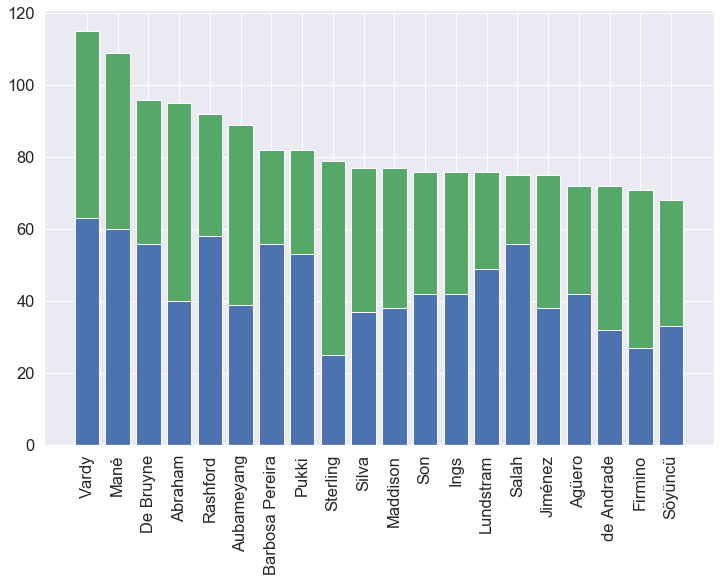

In [87]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
p1 = plt.bar(cap_fdr['Second Name'], cap_fdr['Home Points'], color='b')
p2 = plt.bar(cap_fdr['Second Name'], cap_fdr['Away Points'], bottom=cap_fdr['Home Points'].values, color='g')
#p1.set_xticklabels(cap_fdr['Second Name'], rotation='vertical', fontsize=15)

In [88]:
from matplotlib.colors import ListedColormap
sns.set_style("white")

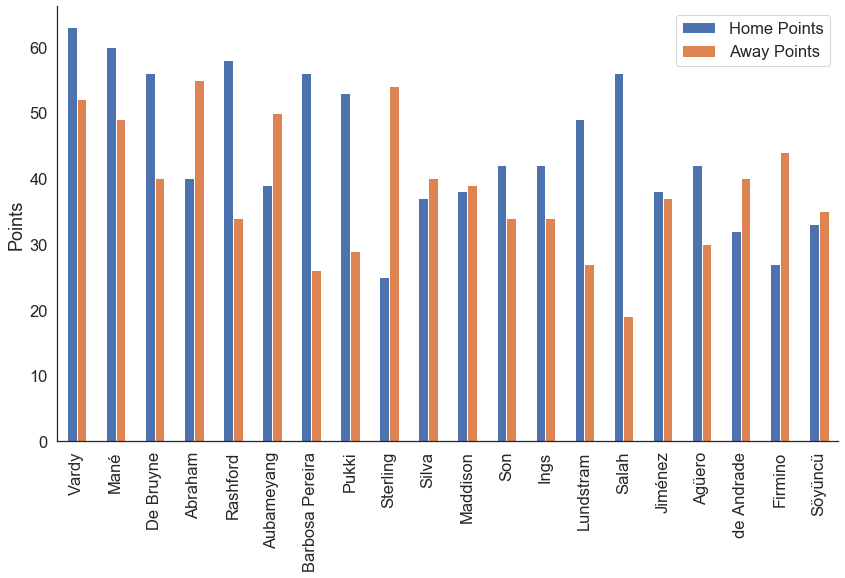

In [89]:
cap_fdr[['Second Name','Home Points','Away Points']].plot(x='Second Name',kind='bar', stacked=False,
                                                          colormap=ListedColormap(sns.color_palette("deep", 2)), 
                                                          figsize=(14,8))
sns.despine()
plt.xlabel('')
plt.ylabel('Points')
plt.show()

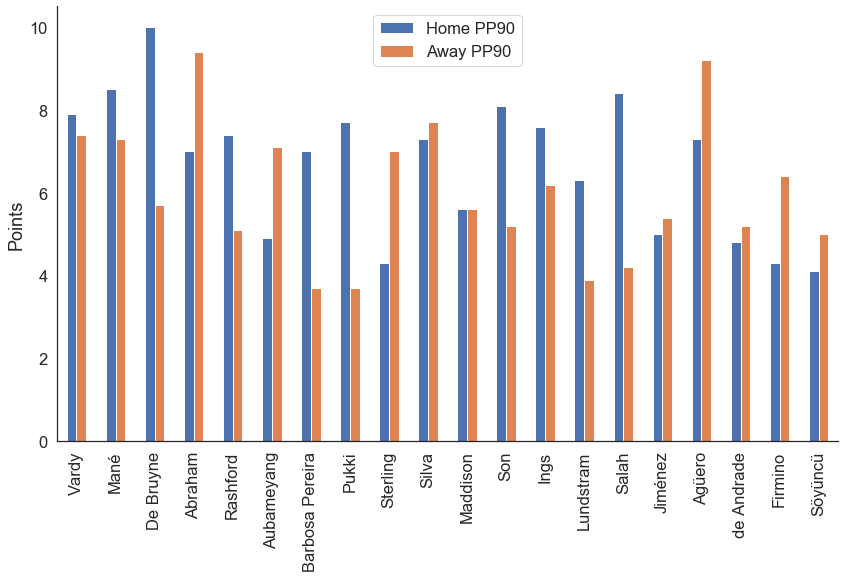

In [90]:
cap_fdr[['Second Name','Home PP90','Away PP90']].plot(x='Second Name',kind='bar', stacked=False,
                                                          colormap=ListedColormap(sns.color_palette("deep", 2)), 
                                                          figsize=(14,8))
sns.despine()
plt.xlabel('')
plt.ylabel('Points')
plt.show()

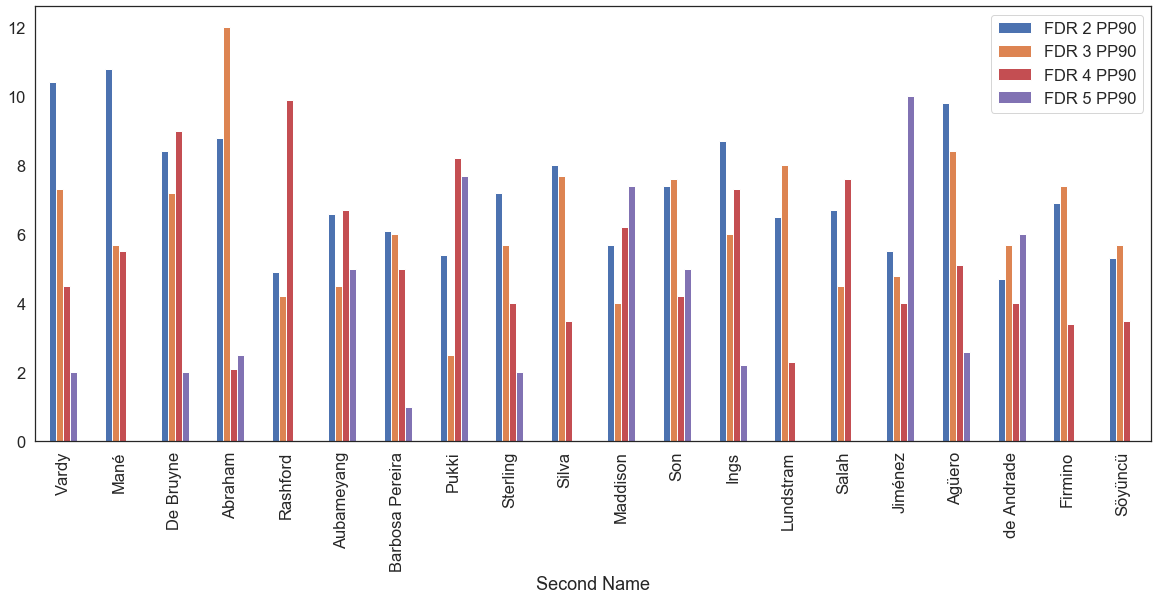

In [91]:
ax1=cap_fdr[['Second Name','FDR 2 PP90','FDR 3 PP90','FDR 4 PP90','FDR 5 PP90']].plot(x='Second Name',kind='bar', stacked=False,
                                                          colormap=ListedColormap(sns.color_palette("deep", 5)), 
                                                          figsize=(20,8))

In [92]:
fpl[(fpl['Position']=='FWD') & (fpl['PP90']>4) & (fpl['Cost']>=9)].sort_values(by='PP90',ascending=False)

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
281,210,Sergio,Agüero,MCI,FWD,9,3,72,810,6,287,2,0,11.8,8.0,4.435,11.2,198,58139
228,166,Jamie,Vardy,LEI,FWD,14,4,115,1350,19,412,7,2,10.0,7.7,5.485,48.6,115457,8277
282,211,Gabriel Fernando,de Jesus,MCI,FWD,5,2,47,635,4,171,3,1,9.6,6.7,3.593,3.6,51845,8803
11,12,Alexandre,Lacazette,ARS,FWD,5,2,47,661,6,160,0,2,9.3,6.4,3.348,2.4,4816,16109
10,11,Pierre-Emerick,Aubameyang,ARS,FWD,10,2,89,1350,15,342,2,2,10.9,5.9,3.678,22.3,19539,122258
254,187,Roberto,Firmino,LIV,FWD,4,5,71,1178,12,270,4,0,9.4,5.4,3.376,9.9,11369,49383
456,338,Harry,Kane,TOT,FWD,7,1,67,1254,9,221,1,1,10.9,4.8,3.277,18.0,42201,73699


In [93]:
fpl[(fpl['Position']=='FWD') & (fpl['PP90']>4) & (fpl['Total Points']>30) & (fpl['Cost']<7)].sort_values(by='PP90',ascending=False)

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
389,70,Lys,Mousset,SHU,FWD,5,3,54,527,9,192,2,0,5.1,9.2,3.819,7.1,59470,36847
255,188,Divock,Origi,LIV,FWD,3,1,35,360,6,130,0,0,5.2,8.8,4.291,2.8,14059,2664
423,313,Danny,Ings,SOU,FWD,8,1,76,987,16,277,1,1,6.3,6.9,3.151,10.0,108515,21782
367,278,Teemu,Pukki,NOR,FWD,8,3,82,1335,13,303,2,2,6.6,5.5,4.717,18.7,47328,35614
114,534,Aaron,Connolly,BHA,FWD,2,2,33,558,3,83,2,0,4.7,5.3,3.717,2.4,6526,16167
112,502,Neal,Maupay,BHA,FWD,5,0,56,1064,10,165,4,1,5.8,4.7,2.977,1.0,8183,4471
125,90,Ashley,Barnes,BUR,FWD,6,0,54,1058,6,156,6,3,6.3,4.6,3.399,3.9,1826,38146
67,68,Joshua,King,BOU,FWD,3,3,50,1006,6,161,2,0,6.2,4.5,3.532,4.5,97,30117
201,147,Dominic,Calvert-Lewin,EVE,FWD,3,0,33,677,2,95,2,1,5.7,4.4,2.135,0.9,612,2924
126,91,Chris,Wood,BUR,FWD,6,0,51,1067,5,145,5,1,6.2,4.3,3.430,1.1,2388,11145


In [94]:
fpl[(fpl['Position']=='FWD') & (fpl['Cost']>=7) & (fpl['Total Points']>30) & (fpl['Cost']<9)].sort_values(by='PP90',ascending=False)

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
162,460,Tammy,Abraham,CHE,FWD,11,3,95,1041,19,321,4,2,7.9,8.2,4.988,34.5,298068,44016
311,233,Marcus,Rashford,MUN,FWD,9,5,92,1306,17,342,3,2,8.8,6.3,4.129,19.2,143873,24072
546,409,Raúl,Jiménez,WOL,FWD,6,3,75,1295,14,270,5,2,7.6,5.2,3.098,21.4,33052,193229
66,67,Callum,Wilson,BOU,FWD,5,3,60,1310,4,190,3,3,7.5,4.1,3.055,6.4,2386,48527
534,457,Sébastien,Haller,WHU,FWD,4,2,53,1173,5,187,3,1,7.0,4.1,3.166,2.6,1758,11597


In [95]:
stk = fpl[(fpl['Position']=='FWD') & (fpl['PP90']>4) & (fpl['Total Points']>30)].sort_values(by='PP90',ascending=False)

In [96]:
stk

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
389,70,Lys,Mousset,SHU,FWD,5,3,54,527,9,192,2,0,5.1,9.2,3.819,7.1,59470,36847
255,188,Divock,Origi,LIV,FWD,3,1,35,360,6,130,0,0,5.2,8.8,4.291,2.8,14059,2664
162,460,Tammy,Abraham,CHE,FWD,11,3,95,1041,19,321,4,2,7.9,8.2,4.988,34.5,298068,44016
281,210,Sergio,Agüero,MCI,FWD,9,3,72,810,6,287,2,0,11.8,8.0,4.435,11.2,198,58139
228,166,Jamie,Vardy,LEI,FWD,14,4,115,1350,19,412,7,2,10.0,7.7,5.485,48.6,115457,8277
423,313,Danny,Ings,SOU,FWD,8,1,76,987,16,277,1,1,6.3,6.9,3.151,10.0,108515,21782
282,211,Gabriel Fernando,de Jesus,MCI,FWD,5,2,47,635,4,171,3,1,9.6,6.7,3.593,3.6,51845,8803
11,12,Alexandre,Lacazette,ARS,FWD,5,2,47,661,6,160,0,2,9.3,6.4,3.348,2.4,4816,16109
311,233,Marcus,Rashford,MUN,FWD,9,5,92,1306,17,342,3,2,8.8,6.3,4.129,19.2,143873,24072
10,11,Pierre-Emerick,Aubameyang,ARS,FWD,10,2,89,1350,15,342,2,2,10.9,5.9,3.678,22.3,19539,122258


In [97]:
stkFDRdetails = getFDRdetails(stk['Id'].values)

In [98]:
stk_fdr = pd.DataFrame(data = {
    'Id':stk['Id'],
    'First Name':stk['First Name'], 
    'Second Name':stk['Second Name'], 
    'Club':stk['Club'], 
    'Position':stk['Position'], 
    'Goals Scored':stk['Goals Scored'],
    'Assists':stk['Assists'] ,
    'Total Points':stk['Total Points'],
    'Minutes':stk['Minutes'],
    'Home Points':stkFDRdetails[0],
    'Away Points':stkFDRdetails[2],
    'Home PP90':stkFDRdetails[1] ,
    'Away PP90':stkFDRdetails[3] ,
    'FDR 2 PP90':stkFDRdetails[4],
    'FDR 3 PP90':stkFDRdetails[5],
    'FDR 4 PP90':stkFDRdetails[6],
    'FDR 5 PP90':stkFDRdetails[7],
    'Cost':stk['Cost']
})

In [99]:
stk_fdr[stk_fdr['Cost']<7].sort_values(by='Cost')

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Home Points,Away Points,Home PP90,Away PP90,FDR 2 PP90,FDR 3 PP90,FDR 4 PP90,FDR 5 PP90,Cost
114,534,Aaron,Connolly,BHA,FWD,2,2,33,558,24.0,9.0,8.7,2.6,5.0,4.5,6.8,2.7,4.7
389,70,Lys,Mousset,SHU,FWD,5,3,54,527,29.0,25.0,10.0,8.5,12.6,11.2,6.1,0.0,5.1
189,468,Jordan,Ayew,CRY,FWD,4,0,52,1122,21.0,31.0,3.0,5.8,5.0,1.8,4.2,0.0,5.1
255,188,Divock,Origi,LIV,FWD,3,1,35,360,29.0,6.0,12.5,3.6,10.5,5.8,3.8,0.0,5.2
201,147,Dominic,Calvert-Lewin,EVE,FWD,3,0,33,677,11.0,22.0,4.8,4.2,2.3,8.2,4.7,1.5,5.7
112,502,Neal,Maupay,BHA,FWD,5,0,56,1064,31.0,25.0,5.2,4.3,5.8,2.2,4.3,3.4,5.8
67,68,Joshua,King,BOU,FWD,3,3,50,1006,34.0,16.0,6.4,2.7,6.2,2.0,3.4,0.0,6.2
126,91,Chris,Wood,BUR,FWD,6,0,51,1067,26.0,25.0,3.9,4.8,6.4,2.2,2.4,0.0,6.2
423,313,Danny,Ings,SOU,FWD,8,1,76,987,42.0,34.0,7.6,6.2,8.7,6.0,7.3,2.2,6.3
125,90,Ashley,Barnes,BUR,FWD,6,0,54,1058,32.0,22.0,5.3,3.8,5.9,3.4,3.5,0.0,6.3


In [100]:
FWDS = fpl[(fpl['Position']=='FWD') & (fpl['Total Points']>=30) & (fpl['PP90']>=4.5)].sort_values(by='Cost', ascending=True)

In [101]:
FWDS

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
114,534,Aaron,Connolly,BHA,FWD,2,2,33,558,3,83,2,0,4.7,5.3,3.717,2.4,6526,16167
389,70,Lys,Mousset,SHU,FWD,5,3,54,527,9,192,2,0,5.1,9.2,3.819,7.1,59470,36847
255,188,Divock,Origi,LIV,FWD,3,1,35,360,6,130,0,0,5.2,8.8,4.291,2.8,14059,2664
112,502,Neal,Maupay,BHA,FWD,5,0,56,1064,10,165,4,1,5.8,4.7,2.977,1.0,8183,4471
67,68,Joshua,King,BOU,FWD,3,3,50,1006,6,161,2,0,6.2,4.5,3.532,4.5,97,30117
125,90,Ashley,Barnes,BUR,FWD,6,0,54,1058,6,156,6,3,6.3,4.6,3.399,3.9,1826,38146
423,313,Danny,Ings,SOU,FWD,8,1,76,987,16,277,1,1,6.3,6.9,3.151,10.0,108515,21782
367,278,Teemu,Pukki,NOR,FWD,8,3,82,1335,13,303,2,2,6.6,5.5,4.717,18.7,47328,35614
546,409,Raúl,Jiménez,WOL,FWD,6,3,75,1295,14,270,5,2,7.6,5.2,3.098,21.4,33052,193229
162,460,Tammy,Abraham,CHE,FWD,11,3,95,1041,19,321,4,2,7.9,8.2,4.988,34.5,298068,44016


In [102]:
fwd_names = (FWDS['Second Name']+' ('+FWDS['Club']+')').tolist()

In [103]:
sns.set_style("darkgrid")

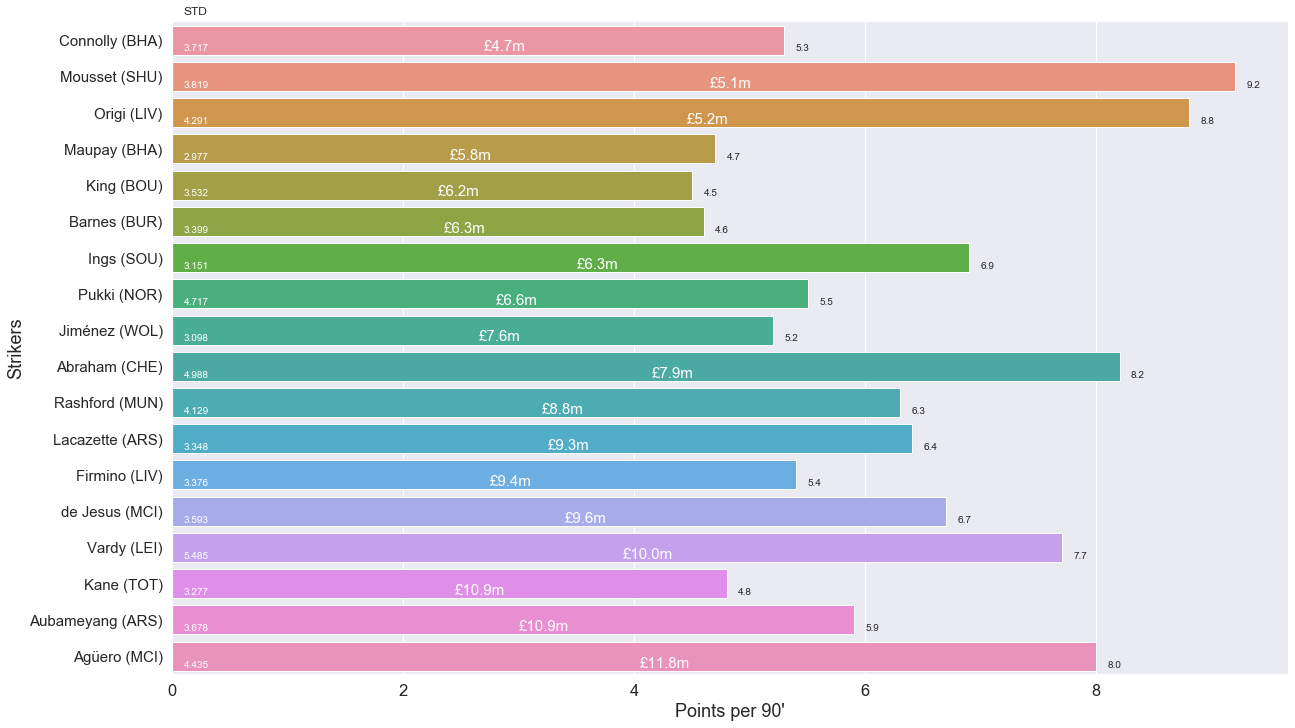

In [104]:
plt.figure(figsize=(20,12))
ax_fwds = sns.barplot(y = FWDS['Second Name'], x = FWDS['PP90'], orient='h')
ax_fwds.set_yticklabels(fwd_names, rotation='horizontal', fontsize=15)
plt.ylabel('Strikers')
plt.xlabel('Points per 90\'')
show_values_on_bars(FWDS,ax_fwds, "h", 0.1)
sns.despine()

In [128]:
fpl[(fpl['Position']=='MID')&(fpl['Total Points']>30)].sort_values(by='Selected By Percent', ascending=False).head(10)

,Id,First Name,Second Name,Club,Position,Goals Scored,Assists,Total Points,Minutes,Bonus,bps,CS,YC,Cost,PP90,STD,Selected By Percent,GW IN,GW OUT
259,192,Sadio,Mané,LIV,MID,9,6,109,1236,15,318,3,1,12.3,7.9,4.932,42.7,164704,19528
286,215,Kevin,De Bruyne,MCI,MID,4,10,96,1132,13,393,6,0,10.3,7.6,4.533,41.1,55682,78293
165,463,Mason,Mount,CHE,MID,5,2,67,1234,6,241,3,2,6.6,4.9,2.918,27.9,79620,60554
285,214,Raheem,Sterling,MCI,MID,8,1,79,1221,7,267,5,4,11.9,5.8,4.879,27.6,9261,165556
233,171,James,Maddison,LEI,MID,5,3,77,1232,10,287,6,1,7.7,5.6,3.202,25.9,104380,29815
258,191,Mohamed,Salah,LIV,MID,6,3,75,1010,8,210,4,0,12.2,6.7,3.982,21.2,28797,106420
376,287,Todd,Cantwell,NOR,MID,4,2,59,1087,5,194,2,1,4.7,4.9,3.193,19.0,86627,25596
460,342,Heung-Min,Son,TOT,MID,4,8,76,1053,9,251,1,0,9.9,6.5,4.487,16.1,115964,48788
159,431,Christian,Pulisic,CHE,MID,5,3,61,827,5,213,1,0,7.5,6.6,5.155,14.7,38245,104686
180,133,Wilfried,Zaha,CRY,MID,2,2,50,1285,3,147,4,2,6.8,3.5,2.700,11.8,96673,19390


In [119]:
np.float(12.1)

12.1